In [114]:
using CSV, DataFrames, Plots, StatsPlots, Statistics

In [115]:
directory = "realy/"
filelist = [f for f in readdir(directory) if endswith(f, ".csv")]
res = similar(DataFrame(CSV.read(directory*filelist[1])),0)
for i in 1:length(filelist)
    res = vcat(res, DataFrame(CSV.read(directory*filelist[i])))
end
res[!,:method_cat] = map(t -> startswith(t,"Imp-then-Reg") ? "Imp-then-Reg" : t, res[:,:method]);

In [156]:
res = res[.!isnan.(res[:,:osr2]), :]

,dataset,splitnum,method,osr2,method_cat
,String,Int64,String,Float64,String
1,COUNT-loomis,1,Complete Features,0.223516,Complete Features
2,COUNT-loomis,1,Imp-then-Reg 1,0.226873,Imp-then-Reg
3,COUNT-loomis,1,Imp-then-Reg 2,0.220976,Imp-then-Reg
4,COUNT-loomis,1,Imp-then-Reg 3,0.230629,Imp-then-Reg
5,COUNT-loomis,1,Imp-then-Reg 4,0.227795,Imp-then-Reg
6,COUNT-loomis,1,Imp-then-Reg 5,0.242791,Imp-then-Reg
7,COUNT-loomis,1,Static,0.231293,Static
8,COUNT-loomis,1,Affine,0.227795,Affine
9,COUNT-loomis,10,Complete Features,0.180556,Complete Features


In [116]:
@show length(unique(res[:,:dataset]))

length(unique(res[:, :dataset])) = 52


52

In [117]:
dataset_list = [d for d in readdir("../datasets/") if length(d) > 0 && d != ".DS_Store"]
setdiff(dataset_list, unique(res[:,:dataset]))

19-element Array{String,1}:
 "MASS-survey"            
 "Zelig-coalition2"       
 "boot-neuro"             
 "car-Davis"              
 "car-Freedman"           
 "car-Hartnagel"          
 "car-SLID"               
 "cluster-plantTraits"    
 "datasets-airquality"    
 "ggplot2-movies"         
 "ggplot2-msleep"         
 "mlmRev-Gcsemv"          
 "plyr-baseball"          
 "reshape2-french_fries"  
 "robustbase-ambientNOxCH"
 "rpart-car.test.frame"   
 "rpart-stagec"           
 "sem-Tests"              
 "sleep"                  

In [118]:
intersect(dataset_list, unique(res[:,:dataset]))

52-element Array{String,1}:
 "COUNT-loomis"                    
 "Ecdat-MCAS"                      
 "Ecdat-Males"                     
 "Ecdat-Mofa"                      
 "Ecdat-RetSchool"                 
 "Ecdat-Schooling"                 
 "MASS-Cars93"                     
 "MASS-Pima.tr2"                   
 "arrhythmia"                      
 "auto-mpg"                        
 "automobile"                      
 "breast-cancer"                   
 "breast-cancer-wisconsin-original"
 ⋮                                 
 "survival-mgus"                   
 "survival-pbc"                    
 "thyroid-disease-allbp"           
 "thyroid-disease-allhyper"        
 "thyroid-disease-allhypo"         
 "thyroid-disease-allrep"          
 "thyroid-disease-dis"             
 "thyroid-disease-sick"            
 "thyroid-disease-sick-euthyroid"  
 "thyroid-disease-thyroid-0387"    
 "trains"                          
 "wiki4he"                         

In [119]:
setdiff(    filter(t -> t[:method] == "Imp-then-Reg 1", res)[:, :dataset],
            filter(t -> t[:method] == "Affine", res)[:, :dataset])

1-element Array{String,1}:
 "trains"

## Claim 1: Mode-imputation does not help


In [120]:
#Select only datasets where at least one missing categorical feature
pattern_count_all = DataFrame(CSV.read("pattern_counts_allfeat.csv"))[:,[:Name,:n,:p,:p_miss]]
rename!(pattern_count_all, :p_miss => :p_miss_all)
pattern_count_num = DataFrame(CSV.read("pattern_counts_numonly.csv"))[:,[:Name,:p_miss]]
rename!(pattern_count_num, :p_miss => :p_miss_num)
relevant_data = join(pattern_count_all, pattern_count_num, on=:Name)
filter!(t -> t[:p_miss_all] > t[:p_miss_num], relevant_data)
relevant_data[!,:p_miss_cat] = relevant_data[:,:p_miss_all] .- relevant_data[:,:p_miss_num]
relevant_data

,Name,n,p,p_miss_all,p_miss_num,p_miss_cat
,String,Int64,Int64,Int64,Int64,Int64
1,COUNT-loomis,384,9,9,0,9
2,Ecdat-Males,4360,37,4,0,4
3,Ecdat-Schooling,3010,51,10,2,8
4,MASS-survey,237,24,23,4,19
5,Zelig-coalition2,314,24,14,0,14
6,automobile,205,69,8,6,2
7,breast-cancer,286,41,7,0,7
8,car-Chile,2532,14,6,3,3
9,car-SLID,7425,8,5,2,3


In [121]:
mi_res = deepcopy(res)
# @show length(unique(mi_res[:,:dataset]))
filter!( t -> t[:dataset] ∈ unique(relevant_data[:,:Name]), mi_res)
# @show length(unique(mi_res[:,:dataset]))
save = unique(mi_res[:,:dataset])
filter!(t -> t[:method] ∈ ["Imp-then-Reg 4", "Imp-then-Reg 5"], mi_res)
# @show length(unique(mi_res[:,:dataset]))
# @show setdiff(save, unique(mi_res[:,:dataset]))
select!(mi_res, Not([:method_cat]))
mi_res[!,:method] = map( t -> t == "Imp-then-Reg 4" ? "Missing_Indicator" : "Mode_Impute", mi_res[:,:method]);
# mi_res[mi_res[:,:osr2] .< 0,:osr2] .= 0.

In [122]:
setdiff(intersect(relevant_data[:,:Name], res[:,:dataset]), unique(mi_res[:,:dataset]))

2-element WeakRefStrings.StringArray{String,1}:
 "cylinder-bands"
 "trains"        

In [123]:
setdiff(    filter(t -> t[:method] == "Imp-then-Reg 4", res)[:, :dataset],
            filter(t -> t[:method] == "Imp-then-Reg 5", res)[:, :dataset])

0-element Array{String,1}

In [124]:
mi_wide = unstack(mi_res, [:dataset, :splitnum], :method, :osr2)
dropmissing!(mi_wide); #TO DO: Check for which dataset/splits this is needed. Should not be 

In [125]:
mi_wide[!, :wins] = 1.0 .* (mi_wide[:,:Missing_Indicator] .> mi_wide[:,:Mode_Impute])
mi_wide[!, :improvement] = mi_wide[:,:Missing_Indicator] .- mi_wide[:,:Mode_Impute] 
mi_wide[!, :rel_improvement] = mi_wide[:, :improvement] ./ abs.(mi_wide[:,:Mode_Impute]);

In [126]:
#Question: Should we average results over each data set before counting improvement?
select!(mi_wide, Not(:splitnum))
mi_wide = aggregate(mi_wide, [:dataset], mean)
rename!(mi_wide, 
        [(:Missing_Indicator_mean => :Missing_Indicator), (:Mode_Impute_mean => :Mode_Impute),
        (:wins_mean => :wins_splitlevel),
        (:improvement_mean => :improvement_splitlevel), (:rel_improvement_mean => :rel_improvement_splitlevel)]
)

mi_wide[!, :wins] = 1.0 .* (mi_wide[:,:Missing_Indicator] .> mi_wide[:,:Mode_Impute])
mi_wide[!, :improvement] = mi_wide[:,:Missing_Indicator] .- mi_wide[:,:Mode_Impute] 
mi_wide[!, :rel_improvement] = mi_wide[:, :improvement] ./ abs.(mi_wide[:,:Mode_Impute]);

In [127]:
@show mean(mi_wide[:,:wins_splitlevel])
@show mean(mi_wide[:,:wins])
@show sum(mi_wide[:,:wins])

mean(mi_wide[:, :wins_splitlevel]) = 0.4895723104056438
mean(mi_wide[:, :wins]) = 0.6388888888888888
sum(mi_wide[:, :wins]) = 23.0


23.0

In [142]:
function iqr(l)
    return quantile(l, .75), quantile(l, .25)
end

iqr (generic function with 1 method)

In [143]:
mi_wide[isnan.(mi_wide[:,:improvement]),:]

,dataset,Missing_Indicator,Mode_Impute,wins_splitlevel,improvement_splitlevel
,String,Float64,Float64,Float64,Float64


In [144]:
res[isnan.(res[:,:osr2]),:]

,dataset,splitnum,method,osr2,method_cat
,String,Int64,String,Float64,String
1,heart-disease-switzerland,5,Complete Features,NaN,Complete Features
2,heart-disease-switzerland,5,Imp-then-Reg 1,NaN,Imp-then-Reg
3,trains,10,Imp-then-Reg 1,NaN,Imp-then-Reg
4,trains,9,Complete Features,NaN,Complete Features


In [145]:
metric = :rel_improvement
μ = median(mi_wide[mi_wide[:,:improvement] .> 0,metric])
CI = std(mi_wide[mi_wide[:,:improvement] .> 0,metric]) / sqrt(sum(mi_wide[:,:improvement] .> 0))
IQR = iqr(mi_wide[mi_wide[:,:improvement] .> 0,metric])
@show μ, CI, IQR

(μ, CI, IQR) = (0.006016329666197838, 0.3761285536203948, (0.02247417848913668, 0.0025037822662262134))


(0.006016329666197838, 0.3761285536203948, (0.02247417848913668, 0.0025037822662262134))

In [148]:
μ = -median(mi_wide[mi_wide[:,:improvement] .< 0,metric])
CI = std(mi_wide[mi_wide[:,:improvement] .< 0,metric]) / sqrt(sum(mi_wide[:,:improvement] .< 0))
IQR = iqr(mi_wide[mi_wide[:,:improvement] .< 0,metric])
@show μ, CI, IQR

(μ, CI, IQR) = (0.0013591801867083413, 0.001091810770788452, (-0.0005143696464945895, -0.0030082623476673787))


(0.0013591801867083413, 0.001091810770788452, (-0.0005143696464945895, -0.0030082623476673787))

In [65]:
mi_wide[:,:wins_splitlevel]

36-element Array{Float64,1}:
 0.8333333333333334 
 0.5                
 0.4166666666666667 
 0.45454545454545453
 0.5454545454545454 
 0.36363636363636365
 0.5454545454545454 
 0.45454545454545453
 0.6363636363636364 
 0.6363636363636364 
 0.45454545454545453
 0.18181818181818182
 0.9090909090909091 
 ⋮                  
 0.6363636363636364 
 0.45454545454545453
 0.45454545454545453
 0.375              
 0.3333333333333333 
 0.3333333333333333 
 0.5555555555555556 
 0.7                
 0.45454545454545453
 0.45454545454545453
 0.36363636363636365
 0.2727272727272727 

In [67]:
mi_augmented = join(mi_wide, rename(relevant_data, :Name => :dataset), on=:dataset)
mi_augmented[!,:prop_miss_cat] = 1.0 .* mi_augmented[:,:p_miss_cat] ./ mi_augmented[:,:p_miss_all]
mi_augmented[!,:prop_miss_cat2] = 1.0 .* mi_augmented[:,:p_miss_cat] ./ mi_augmented[:,:p]
mi_augmented[!,:wins] = map( t -> (t > 0) ? :blue : :red, mi_augmented[:,:wins]);

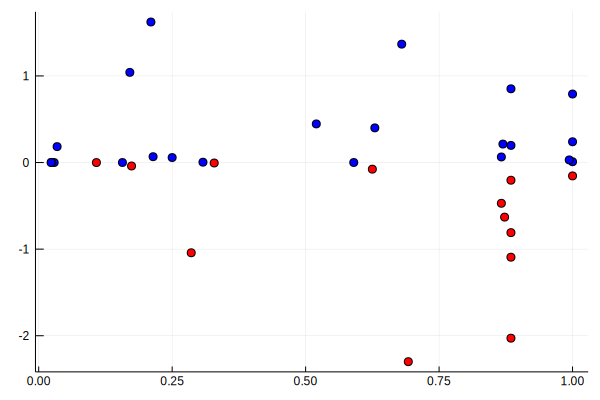

In [72]:
@df mi_augmented scatter(:prop_miss_cat2, :improvement, color=:wins, legend=:none)

In [78]:
mi_augmented[:,[:dataset,:Mode_Impute, :Missing_Indicator,:rel_improvement]]

,dataset,Mode_Impute,Missing_Indicator,rel_improvement
,String,Float64,Float64,Float64
1,COUNT-loomis,0.134656,0.143908,0.0687055
2,Ecdat-Males,0.258188,0.257835,-0.00136757
3,Ecdat-Schooling,0.326204,0.326471,0.000820095
4,automobile,0.672928,0.67304,0.000165792
5,breast-cancer,-43.198,-42.1569,0.0240998
6,car-Chile,-208.999,-208.932,0.000322599
7,communities-and-crime,0.649907,0.65141,0.00231284
8,communities-and-crime-2,0.608948,0.609399,0.000741827
9,congressional-voting-records,-13.4867,-13.2469,0.0177814


## Claim 2: Mean-imputation is good


In [157]:
#Select only datasets where at least one missing numerical feature
pattern_count_num = DataFrame(CSV.read("pattern_counts_numonly.csv"))[:,[:Name,:n,:p,:p_miss]]
rename!(pattern_count_num, :p_miss => :p_miss_num)
filter!(t -> t[:p_miss_num] > 0, pattern_count_num)

,Name,n,p,p_miss_num
,String,Int64,Int64,Int64
1,Ecdat-MCAS,180,13,2
2,Ecdat-Mofa,50,53,1
3,Ecdat-RetSchool,3078,37,4
4,Ecdat-Schooling,3010,53,2
5,MASS-Cars93,93,64,2
6,MASS-Pima.tr2,300,7,3
7,MASS-survey,237,29,4
8,arrhythmia,452,391,5
9,auto-mpg,398,13,1


In [158]:
for d in unique(res[:,:dataset])
    aux = filter(t-> t[:dataset] == d, res)
    filter!(t-> t[:method_cat] == "Imp-then-Reg", aux)
    if size(aux,1) == 0
        @show d
    end
end

d = "cylinder-bands"
d = "trains"


In [159]:
itr_res = deepcopy(res)
@show length(unique(itr_res[:,:dataset]))
filter!(t -> t[:dataset] ∈ unique(pattern_count_num[:,:Name]), itr_res) #filter datasets
@show length(unique(itr_res[:,:dataset]))
filter!(t -> t[:method_cat] == "Imp-then-Reg", itr_res) #compare only impute-then-regress
@show length(unique(itr_res[:,:dataset]))
filter!(t -> t[:method] != "Imp-then-Reg 5", itr_res) #remove mode impute
select!(itr_res, Not(:method_cat))

select!(itr_res, Not(:splitnum))
itr_res = aggregate(itr_res, [:dataset, :method], mean)
@show length(unique(itr_res[:,:dataset]))
rename!(itr_res, :osr2_mean => :osr2)

itr_res[!,:osr2] .= round.(itr_res[:,:osr2], digits=4)
itr_best = by(itr_res, [:dataset]) do df
    DataFrame(results = [sort(unique(df[:,:osr2]), rev=true)])
end
@show length(unique(itr_best[:,:dataset]))

itr_res = join(itr_res, itr_best, on = [:dataset])
@show length(unique(itr_res[:,:dataset]))

rank = zeros(size(itr_res,1))
for i in 1:size(itr_res,1)
    rank[i] = findfirst(itr_res[i,:osr2] .== itr_res[i,:results])
end
itr_res[!,:rank] = rank
itr_res[!,:wins] = 1 .* (itr_res[:,:rank] .== 1)
select!(itr_res, Not(:results))
itr_res
@show length(unique(itr_res[:,:dataset]))

length(unique(itr_res[:, :dataset])) = 52
length(unique(itr_res[:, :dataset])) = 41
length(unique(itr_res[:, :dataset])) = 40
length(unique(itr_res[:, :dataset])) = 40
length(unique(itr_best[:, :dataset])) = 40
length(unique(itr_res[:, :dataset])) = 40
length(unique(itr_res[:, :dataset])) = 40


40

In [160]:
unique(itr_res[:,:dataset])

40-element Array{String,1}:
 "Ecdat-MCAS"                        
 "Ecdat-Mofa"                        
 "Ecdat-RetSchool"                   
 "Ecdat-Schooling"                   
 "MASS-Cars93"                       
 "MASS-Pima.tr2"                     
 "arrhythmia"                        
 "auto-mpg"                          
 "automobile"                        
 "breast-cancer-wisconsin-original"  
 "breast-cancer-wisconsin-prognostic"
 "car-Chile"                         
 "communities-and-crime-2"           
 ⋮                                   
 "survival-cancer"                   
 "survival-mgus"                     
 "survival-pbc"                      
 "thyroid-disease-allbp"             
 "thyroid-disease-allhyper"          
 "thyroid-disease-allhypo"           
 "thyroid-disease-allrep"            
 "thyroid-disease-dis"               
 "thyroid-disease-sick-euthyroid"    
 "thyroid-disease-sick"              
 "thyroid-disease-thyroid-0387"      
 "wiki4he"            

In [161]:
aggregate(itr_res[:,[:method,:wins]], :method, sum)

,method,wins_sum
,String,Int64
1,Imp-then-Reg 1,8
2,Imp-then-Reg 2,10
3,Imp-then-Reg 3,8
4,Imp-then-Reg 4,16


In [162]:
aggregate(itr_res[:,[:method,:rank]], :method, t -> sum(t.>0))

,method,rank_function
,String,Int64
1,Imp-then-Reg 1,40
2,Imp-then-Reg 2,40
3,Imp-then-Reg 3,40
4,Imp-then-Reg 4,40


In [163]:
for m1 in unique(itr_res[:,:method])
    aux1 = filter(t-> t[:method] == m1, itr_res)
    for m2 in unique(itr_res[:,:method])
        if m1 != m2
            aux2 = filter(t-> t[:method] == m2, itr_res)
            wincount = 0 
            for d in unique(itr_res[:,:dataset])
                if aux1[findfirst(aux1[:,:dataset] .== d),:rank] < aux2[findfirst(aux2[:,:dataset] .== d),:rank]
                    wincount += 1
                end
            end 
            println("$m1 wins over $m2 in $wincount instances")
        end
    end
    println()
end

Imp-then-Reg 1 wins over Imp-then-Reg 2 in 20 instances
Imp-then-Reg 1 wins over Imp-then-Reg 3 in 19 instances
Imp-then-Reg 1 wins over Imp-then-Reg 4 in 16 instances

Imp-then-Reg 2 wins over Imp-then-Reg 1 in 18 instances
Imp-then-Reg 2 wins over Imp-then-Reg 3 in 25 instances
Imp-then-Reg 2 wins over Imp-then-Reg 4 in 16 instances

Imp-then-Reg 3 wins over Imp-then-Reg 1 in 20 instances
Imp-then-Reg 3 wins over Imp-then-Reg 2 in 14 instances
Imp-then-Reg 3 wins over Imp-then-Reg 4 in 20 instances

Imp-then-Reg 4 wins over Imp-then-Reg 1 in 22 instances
Imp-then-Reg 4 wins over Imp-then-Reg 2 in 22 instances
Imp-then-Reg 4 wins over Imp-then-Reg 3 in 18 instances



In [164]:
using StatsBase

In [165]:
stack(itr_res[:,[:method, :rank]], :method, t-> sum(t .> 0))

MethodError: MethodError: no method matching getindex(::DataFrames.Index, ::getfield(Main, Symbol("##171#172")))
Closest candidates are:
  getindex(::DataFrames.Index, !Matched::Symbol) at /Users/jpauph/.julia/packages/DataFrames/yH0f6/src/other/index.jl:247
  getindex(::DataFrames.Index, !Matched::AbstractArray{Symbol,1}) at /Users/jpauph/.julia/packages/DataFrames/yH0f6/src/other/index.jl:249
  getindex(::DataFrames.AbstractIndex, !Matched::Bool) at /Users/jpauph/.julia/packages/DataFrames/yH0f6/src/other/index.jl:142
  ...

,method,x1,x2,x3,x4
,String,Int64,Int64,Int64,Int64
1,Imp-then-Reg 1,5,12,14,9
2,Imp-then-Reg 2,8,15,9,8
3,Imp-then-Reg 3,6,11,13,10
4,Imp-then-Reg 4,22,5,5,8


In [166]:
distr_rank = by(itr_res, :method) do df
    [sum(df[:,:rank].==1) (sum(df[:,:rank].==2)) (sum(df[:,:rank].==3)) (sum(df[:,:rank].==4))]
end

groupedbar(Matrix(distr_rank[:,2:end])', bar_position = :dodge, fill=.7, label=["V1" "V2" "V3" "V4"], size= (800,400))
xaxis!("Rank")
yaxis!("Count")
savefig("realy_imputethenreg_freq.png")

37-element Array{String,1}:
 "COUNT-loomis"                  
 "Ecdat-Males"                   
 "Ecdat-Schooling"               
 "automobile"                    
 "breast-cancer"                 
 "car-Chile"                     
 "communities-and-crime"         
 "communities-and-crime-2"       
 "congressional-voting-records"  
 "credit-approval"               
 "echocardiogram"                
 "heart-disease-cleveland"       
 "heart-disease-hungarian"       
 ⋮                               
 "survival-cancer"               
 "survival-pbc"                  
 "thyroid-disease-allbp"         
 "thyroid-disease-allhyper"      
 "thyroid-disease-allhypo"       
 "thyroid-disease-allrep"        
 "thyroid-disease-dis"           
 "thyroid-disease-sick"          
 "thyroid-disease-sick-euthyroid"
 "thyroid-disease-thyroid-0387"  
 "trains"                        
 "wiki4he"                       

In [249]:
union(unique(itr_res[:,:dataset]), unique(mi_wide[:,:dataset]))

51-element Array{String,1}:
 "Ecdat-MCAS"                        
 "Ecdat-Mofa"                        
 "Ecdat-RetSchool"                   
 "Ecdat-Schooling"                   
 "MASS-Cars93"                       
 "MASS-Pima.tr2"                     
 "arrhythmia"                        
 "auto-mpg"                          
 "automobile"                        
 "breast-cancer-wisconsin-original"  
 "breast-cancer-wisconsin-prognostic"
 "car-Chile"                         
 "communities-and-crime-2"           
 ⋮                                   
 "wiki4he"                           
 "COUNT-loomis"                      
 "Ecdat-Males"                       
 "breast-cancer"                     
 "congressional-voting-records"      
 "heart-disease-cleveland"           
 "lung-cancer"                       
 "mushroom"                          
 "post-operative-patient"            
 "shuttle-landing-control"           
 "soybean-large"                     
 "trains"             

## Claim 3: Compare our approach to state-of-the-art

In [167]:
#Select only datasets where at least one missing numerical feature
pattern_count_num = DataFrame(CSV.read("pattern_counts_numonly.csv"))[:,[:Name,:p_miss]]
rename!(pattern_count_num, :p_miss => :p_miss_num)
filter!(t -> t[:p_miss_num] > 0, pattern_count_num)

,Name,p_miss_num
,String,Int64
1,Ecdat-MCAS,2
2,Ecdat-Mofa,1
3,Ecdat-RetSchool,4
4,Ecdat-Schooling,2
5,MASS-Cars93,2
6,MASS-Pima.tr2,3
7,MASS-survey,4
8,arrhythmia,5
9,auto-mpg,1


In [168]:
all_res = deepcopy(res)
filter!(t -> t[:dataset] ∈ unique(pattern_count_num[:,:Name]), all_res) #filter datasets
select!(all_res, Not(:method_cat))
sort!(all_res, [:dataset, :splitnum, :method])

#Average over splits
all_res = aggregate(all_res[:,[:dataset, :method, :osr2]], [:dataset, :method], mean)
rename!(all_res, :osr2_mean => :osr2)
all_res[!,:osr2] = round.(all_res[:,:osr2], digits=4);

best_pred = by(all_res, [:dataset]) do df
    DataFrame(results = [sort(unique(df[:,:osr2]), rev=true)])
end

all_res = join(all_res, best_pred, on = [:dataset])

rank = zeros(size(all_res,1))
for i in 1:size(all_res,1)
    rank[i] = findfirst(all_res[i,:osr2] .== all_res[i,:results])
end
all_res[!,:rank] = rank
select!(all_res, Not(:results))
all_res

,dataset,method,osr2,rank
,String,String,Float64,Float64
1,Ecdat-MCAS,Affine,0.8162,5.0
2,Ecdat-MCAS,Complete Features,0.8036,8.0
3,Ecdat-MCAS,Imp-then-Reg 1,0.8272,2.0
4,Ecdat-MCAS,Imp-then-Reg 2,0.8201,4.0
5,Ecdat-MCAS,Imp-then-Reg 3,0.8262,3.0
6,Ecdat-MCAS,Imp-then-Reg 4,0.8074,7.0
7,Ecdat-MCAS,Imp-then-Reg 5,0.8079,6.0
8,Ecdat-MCAS,Static,0.832,1.0
9,Ecdat-Mofa,Affine,0.5793,1.0


In [169]:
for m1 in unique(all_res[:,:method])
    aux1 = filter(t-> t[:method] == m1, all_res)
    if m1 ∉ ["Imp-then-Reg $i" for i in [1,2,3,5]]
        for m2 in unique(all_res[:,:method])
            if m1 != m2 && m2 ∉ ["Imp-then-Reg $i" for i in [1,2,3,5]]
                aux2 = filter(t-> t[:method] == m2, all_res)
                wincount = 0 
                for d in unique(all_res[:,:dataset])
                    try
                        if aux1[findfirst(aux1[:,:dataset] .== d),:rank] < aux2[findfirst(aux2[:,:dataset] .== d),:rank]
                            wincount += 1
                        end
                    catch
                        ()
                    end
                end 
                println("$m1 wins over $m2 in $wincount instances")
            end
        end
        println()
    end
end

Affine wins over Complete Features in 32 instances
Affine wins over Imp-then-Reg 4 in 21 instances
Affine wins over Static in 24 instances

Complete Features wins over Affine in 7 instances
Complete Features wins over Imp-then-Reg 4 in 9 instances
Complete Features wins over Static in 11 instances

Imp-then-Reg 4 wins over Affine in 19 instances
Imp-then-Reg 4 wins over Complete Features in 31 instances
Imp-then-Reg 4 wins over Static in 25 instances

Static wins over Affine in 16 instances
Static wins over Complete Features in 29 instances
Static wins over Imp-then-Reg 4 in 14 instances

